# Soil Analysis Using CNN

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os

In [21]:
dir_black = os.path.join('Soil types/Black Soil')
dir_Cinder = os.path.join('Soil types/Cinder Soil')
dir_Laterite = os.path.join('Soil types/Laterite Soil')
dir_peat = os.path.join('Soil types/Peat Soil')
dir_yellow = os.path.join('Soil types/Yellow Soil')

In [22]:
image_size = 220
batch_size = 10
target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
        'Soil types/', 
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [24]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [25]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 109, 109, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 25, 25, 64)       

In [28]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [29]:
total_sample = train_generator.n
n_epochs = 50

In [30]:
history = model.fit(
        train_generator, 
        steps_per_epoch = int(total_sample/batch_size),  
        epochs = n_epochs,
        verbose = 1)

Epoch 1/50


15/15 [==============================] - 4s 161ms/step - loss: 1.6299 - acc: 0.1918
Epoch 2/50
15/15 [==============================] - 3s 187ms/step - loss: 1.4204 - acc: 0.3767
Epoch 3/50
15/15 [==============================] - 3s 176ms/step - loss: 1.1020 - acc: 0.4178
Epoch 4/50
15/15 [==============================] - 3s 171ms/step - loss: 1.0812 - acc: 0.4315
Epoch 5/50
15/15 [==============================] - 3s 167ms/step - loss: 1.0491 - acc: 0.4589
Epoch 6/50
15/15 [==============================] - 3s 172ms/step - loss: 0.9335 - acc: 0.6438
Epoch 7/50
15/15 [==============================] - 2s 150ms/step - loss: 0.8653 - acc: 0.5685
Epoch 8/50
15/15 [==============================] - 2s 148ms/step - loss: 0.8033 - acc: 0.6575
Epoch 9/50
15/15 [==============================] - 2s 155ms/step - loss: 0.6718 - acc: 0.7466
Epoch 10/50
15/15 [==============================] - 2s 154ms/step - loss: 0.5246 - acc: 0.8067
Epoch 11/50
15/15 [==============================] - 2s 152m

In [31]:
import matplotlib.pyplot as plt

In [32]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

TypeError: 'History' object is not subscriptable

<Figure size 700x400 with 0 Axes>

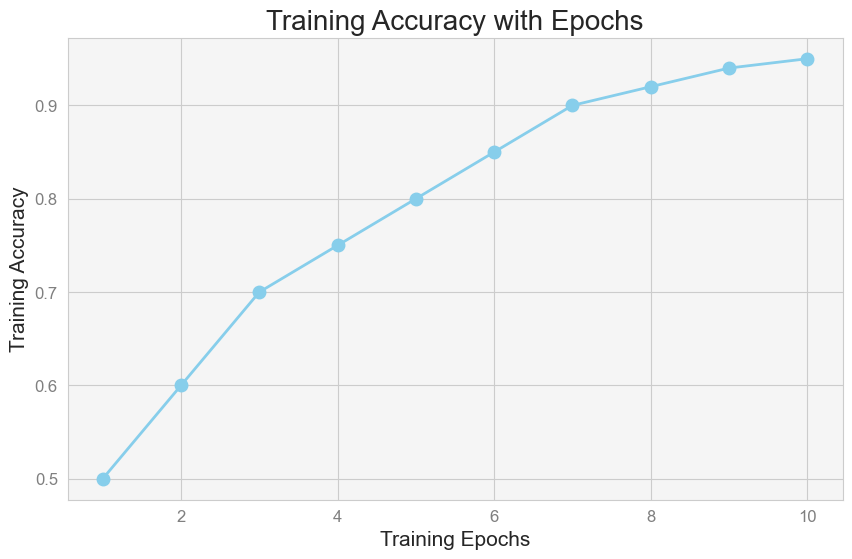

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Your existing data and plot code
n_epochs = 10  # Assuming this is defined somewhere in your code
history = {'acc': [0.5, 0.6, 0.7, 0.75, 0.8, 0.85, 0.9, 0.92, 0.94, 0.95]}  # Example data

plt.figure(figsize=(10, 6))  # Adjust the figure size to your preference

# Setting a Seaborn style
sns.set_style("whitegrid")

# Plotting the data with improved aesthetics
plt.plot(range(1, n_epochs + 1), history['acc'], marker='o', color='skyblue', linewidth=2, markersize=9)

# Title and labels with increased font sizes
plt.title("Training Accuracy with Epochs", fontsize=20)
plt.xlabel("Training Epochs", fontsize=15)
plt.ylabel("Training Accuracy", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customizing background color and tick colors
plt.gca().set_facecolor('#f5f5f5')  # Set background color
plt.tick_params(axis='x', colors='gray')  # Set x-axis tick color
plt.tick_params(axis='y', colors='gray')  # Set y-axis tick color

# Showing the plot
plt.show()


In [ ]:
model.save('soil_analysis_V1.h5')

# End